# <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">🍕 PIZZA RESTAURANT SALES 🍕</p>

<p style="text-align:center; ">
<img src="https://media0.giphy.com/media/9KCNcFVQmZhRK/200w.webp?cid=ecf05e47aqgpufwb3d2xro5ryh9cwk43htx0nh5vhiep8e69&rid=200w.webp&ct=g" style='width: 600px; height: 300px;'>
</p>

<p style="text-align:justify; ">
 <p style="padding:10px;background-color:black;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">This pizza sales dataset make up 12 relevant features:

     
1- Order_id: Unique identifier for each order placed by a table
     
2- Order_details_id: Unique identifier for each pizza placed within each order (pizzas of the same type and size are kept in the same row, and the quantity increases)
     
3- Pizza_id: Unique key identifier that ties the pizza ordered to its details, like size and price
     
4- Quantity: Quantity ordered for each pizza of the same type and size
     
5- Order_date: Date the order was placed (entered into the system prior to cooking & serving)
     
6- Order_time: Time the order was placed (entered into the system prior to cooking & serving)
     
7- Unit_price: Price of the pizza in USD
     
8- Total_price: unit_price * quantity
     
9- Pizza_size: Size of the pizza (Small, Medium, Large, X Large, or XX Large)
     
10- Pizza_type: Unique key identifier that ties the pizza ordered to its details, like size and price
     
11- Pizza_ingredients: ingredients used in the pizza as shown in the menu (they all include Mozzarella Cheese, even if not specified; and they all include Tomato Sauce, unless another sauce is specified)
     
12- Pizza_name: Name of the pizza as shown in the menu

</p>


   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>


 <p style="padding:10px;background-color:BLACK;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">🍕 TABLE OF CONTENTS 🍕</p>
    
    
* [📌 IMPORTING LIBRARIES](#1)
    
* [📌 LOADING DATASET](#2)
  
* [📌 EXPLORATORY SOME INFORMATION ABOUT DATASET](#3)

* [📌 DATA VISUALIZATION](#4)

* [📌 RESULT](#5)

* [📌 AUTHOR MESSAGE](#6)
 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('Solarize_Light2')
plt.style.context('grayscale')
%matplotlib inline
#plt.style.available[:5]
from wordcloud import WordCloud, STOPWORDS


In [ ]:
<a id="2"></a>
# <p style="padding:10px;background-color:black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">🍕Loading Dataset🍕</p>


In [2]:
df=pd.read_excel("../input/pizza-sales/Data Model - Pizza Sales.xlsx")
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [ ]:
<a id="3"></a>
# <p style="padding:10px;background-color:black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">🍕Exploratory Some Information About Dataset🍕</p>


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [4]:
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [5]:
df.shape

(48620, 12)

In [6]:
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [7]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [8]:
df['order_time']=df['order_time'].astype('string')
df[['Hour','Minute', 'Second']]= df['order_time'].str.split(":",expand=True)
df["Hour"].value_counts()

12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
09       4
Name: Hour, dtype: Int64

In [ ]:
<a id="4"></a>
# <p style="padding:10px;background-color:black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">🍕Data Visualization🍕</p>


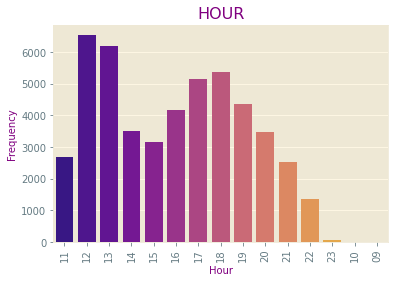

In [9]:
sns.countplot(data=df,x="Hour",palette="plasma")
plt.xticks(rotation=90)
plt.xlabel("Hour",fontsize=10,color="purple")
plt.ylabel("Frequency",fontsize=10,color="purple")
plt.title("HOUR",color="purple")
plt.show()

In [10]:
df['order_year'] =pd.DatetimeIndex( df['order_date']).year
df['order_year'].value_counts()

2015    48620
Name: order_year, dtype: int64

In [11]:
df['order_dates'] = df['order_date'].dt.day_name()
df['order_dates'].value_counts()


Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: order_dates, dtype: int64

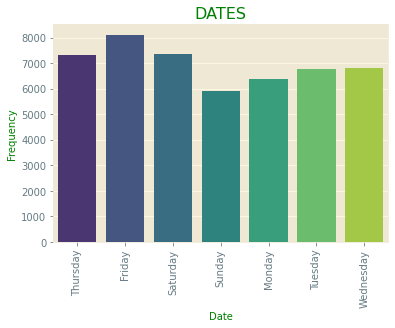

In [12]:
sns.countplot(data=df,x="order_dates",palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Date",fontsize=10,color="green")
plt.ylabel("Frequency",fontsize=10,color="green")
plt.title("DATES",color="green")
plt.show()

In [13]:
df['order_month'] =pd.DatetimeIndex (df['order_date']).month
df.loc[(df['order_month'] ==1), 'order_month'] = 'January'
df.loc[(df['order_month'] ==2), 'order_month'] = 'February'
df.loc[(df['order_month'] ==3), 'order_month'] = 'March'
df.loc[(df['order_month'] ==4), 'order_month'] = 'April'
df.loc[(df['order_month'] ==5), 'order_month'] = 'May'
df.loc[(df['order_month'] ==6), 'order_month'] = 'June'
df.loc[(df['order_month'] ==7), 'order_month'] = 'July'
df.loc[(df['order_month'] ==8), 'order_month'] = 'August'
df.loc[(df['order_month'] ==9), 'order_month'] = 'September'
df.loc[(df['order_month'] ==10), 'order_month'] = 'October'
df.loc[(df['order_month'] ==11), 'order_month'] = 'November'
df.loc[(df['order_month'] ==12), 'order_month'] = 'December'
df['order_month'].value_counts()


July         4301
May          4239
March        4186
November     4185
January      4156
August       4094
April        4067
June         4025
February     3892
December     3859
September    3819
October      3797
Name: order_month, dtype: int64

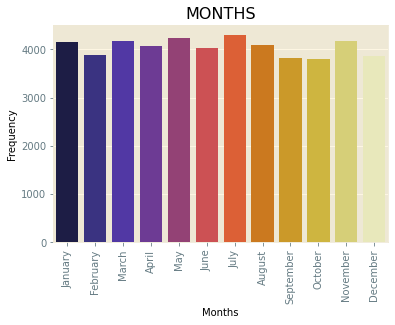

In [14]:
sns.countplot(data=df,x="order_month",palette="CMRmap")
plt.xticks(rotation=90)
plt.xlabel("Months",fontsize=10,color="black")
plt.ylabel("Frequency",fontsize=10,color="black")
plt.title("MONTHS",color="black")
plt.show()

In [15]:
df.pizza_id.value_counts()

big_meat_s        1811
thai_ckn_l        1365
five_cheese_l     1359
four_cheese_l     1273
classic_dlx_m     1159
                  ... 
mexicana_s         160
calabrese_s         99
ckn_alfredo_s       96
green_garden_l      94
the_greek_xxl       28
Name: pizza_id, Length: 91, dtype: int64

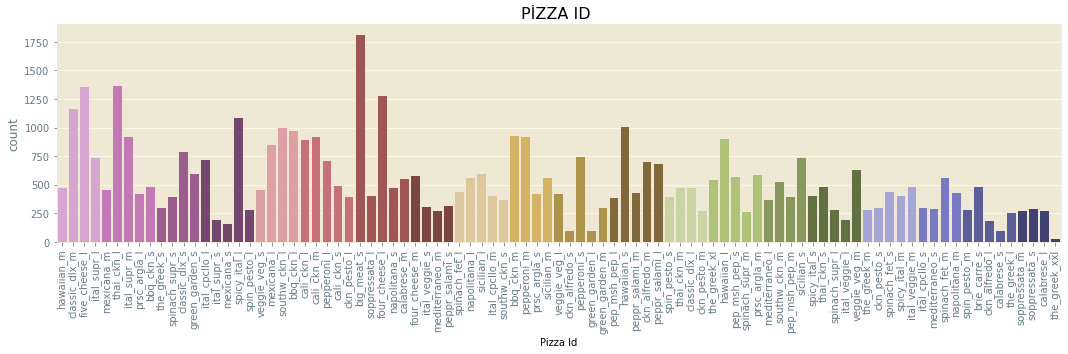

In [16]:
fig, ax = plt.subplots(figsize=(18, 4))
sns.countplot(data=df,x="pizza_id",palette="tab20b_r",ax=ax)
plt.xticks(rotation=90)
plt.xlabel("Pizza Id",fontsize=10,color="black")
plt.title("PİZZA ID ",color="black")
plt.show()

In [17]:
df.quantity.value_counts()

1    47693
2      903
3       21
4        3
Name: quantity, dtype: int64

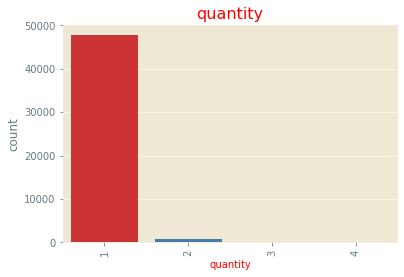

In [18]:
sns.countplot(data=df,x="quantity",palette="Set1")
plt.xticks(rotation=90)
plt.xlabel("quantity",fontsize=10,color="red")
plt.title("quantity",color="red")
plt.show()

In [19]:
df.pizza_size.value_counts()

L      18526
M      15385
S      14137
XL       544
XXL       28
Name: pizza_size, dtype: int64

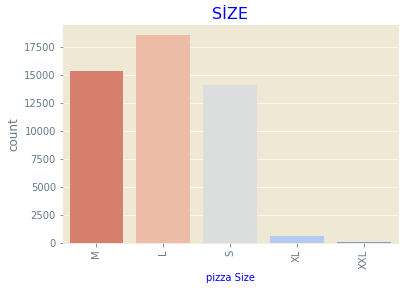

In [20]:
sns.countplot(data=df,x="pizza_size",palette="coolwarm_r")
plt.xticks(rotation=90)
plt.xlabel("pizza Size",fontsize=10,color="b")
plt.title("SİZE",color="b")
plt.show()

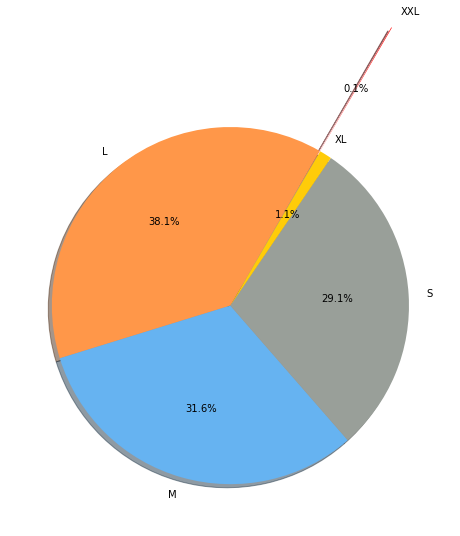

In [21]:
labels = df["pizza_size"].value_counts().index
sizes = df["pizza_size"].value_counts()
plt.figure(figsize = (8,10))

colors = ['#ff9749','#66b3f1','#999f99','#ffcc09',"RED","cyan"]
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=60,explode=(0,0,0,0,0.8))
plt.show()

In [22]:
df.pizza_category.value_counts()

Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: pizza_category, dtype: int64

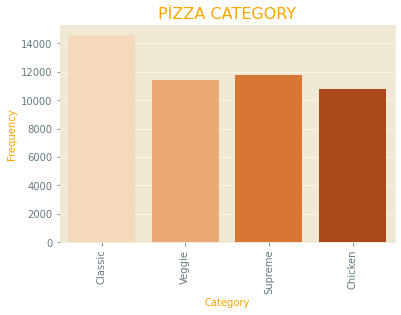

In [23]:
sns.countplot(data=df,x="pizza_category",palette="Oranges")
plt.xticks(rotation=90)
plt.xlabel("Category",fontsize=10,color="orange")
plt.ylabel("Frequency",fontsize=10,color="orange")
plt.title("PİZZA CATEGORY",color="orange")
plt.show()

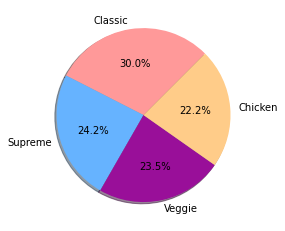

In [24]:
labels = df["pizza_category"].value_counts().index
sizes = df["pizza_category"].value_counts()
colors = ['#ff9999','#66b3ff','#990f99','#ffcc89',"pink","yellow"]
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)
plt.show()

In [25]:
df.Hour.value_counts()

12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
09       4
Name: Hour, dtype: Int64

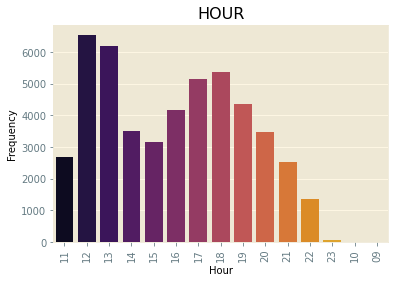

In [26]:
sns.countplot(data=df,x="Hour",palette="inferno")
plt.xticks(rotation=90)
plt.xlabel("Hour",fontsize=10,color="black")
plt.ylabel("Frequency",fontsize=10,color="black")
plt.title("HOUR",color="black")
plt.show()

In [ ]:
df.pizza_ingredients.value_counts()

In [ ]:
df.pizza_name.value_counts()

In [ ]:
px.bar(data_frame=df, x='order_dates',color_discrete_sequence=['green'],
       labels={'order_dates':'count'},
       template='plotly_white',title='<b> Which day is the most ordered?')

In [30]:
px.box(df,x='pizza_name',y='total_price',
       color='pizza_name',template='seaborn',
       labels={'pizza_name':'Name','total_price':'Price'},
       title='<b>Pizza Names and Prices')

In [ ]:
fig=px.pie(df.groupby('pizza_size',as_index=False)['total_price'].count().sort_values(by='total_price',
                                                                                              ascending=False),names='pizza_size',
           values='total_price',color='pizza_size',hole=0.7,labels={'pizza_size':'pizza_size','total_price':'price'},
           template='ggplot2',title='<b>  Pizza Sizes')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))

In [32]:
z=df['pizza_category'].value_counts()
fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,labels={'index':'pizza_category','y':'total_price','text':'total_price'},template='ggplot2',title='<b>Total Money Earned From Pizza Categories and Pie chart</b> ')
fig.show()
fig=px.pie(z,names=z.index,values=z.values,labels={'index':'pizza_category','y':'total_price','text':'total_price'},template='ggplot2')
fig.show()

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x="order_month", data=df, aspect=4.0, kind='count',hue='order_dates',palette="pastel")
g.set_ylabels('Frequency')
g.set_xlabels("Months")
plt.show()

In [34]:
fig = px.strip(df, x='order_dates', y='Hour', color='order_dates')
fig.show()

In [35]:
joint_data=df.sort_values(by='total_price', ascending=False)

top_rated=joint_data[:]
fig =px.sunburst(
    top_rated,
    path=['pizza_category',"pizza_size"],
    values='total_price',
    color='total_price')
fig.show()

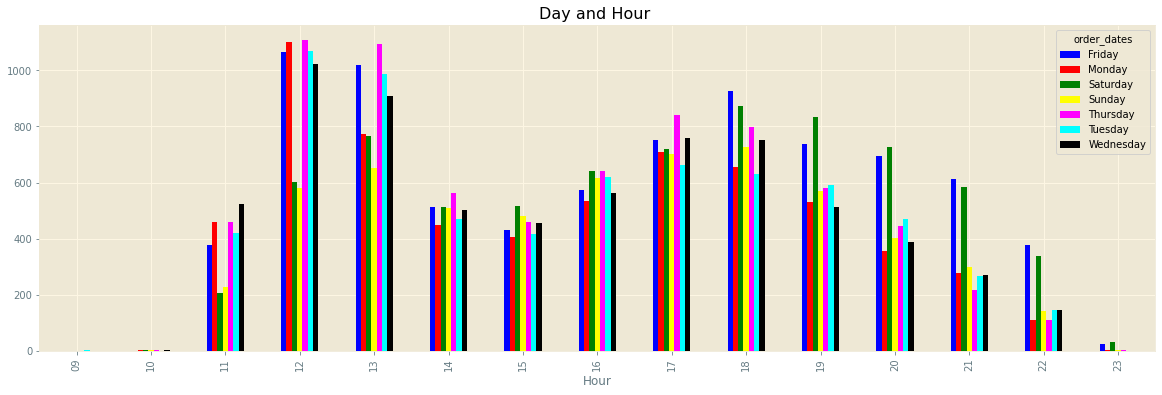

In [36]:
pd.crosstab(df["Hour"], df["order_dates"]).plot(kind="bar", figsize=(20, 6),
                                                color=["blue","red","green","yellow","magenta","cyan","black","orange"],
                                                title="Day and Hour ")
plt.show()

In [37]:
df1 = df.groupby(["pizza_size","pizza_category"],as_index=False)[['total_price']].median().rename(columns={'total_price':'price'})
fig = px.treemap(df1, path = [px.Constant("all"), "pizza_size","pizza_category"], 
                 values   ='price', color='pizza_size',
                 color_discrete_map={'(?)':'lightgrey', 'Lunch':'gold', 'Dinner':'darkblue'})
fig.update_layout(margin  = dict(t=50, l=25, r=25, b=25))
fig.show()

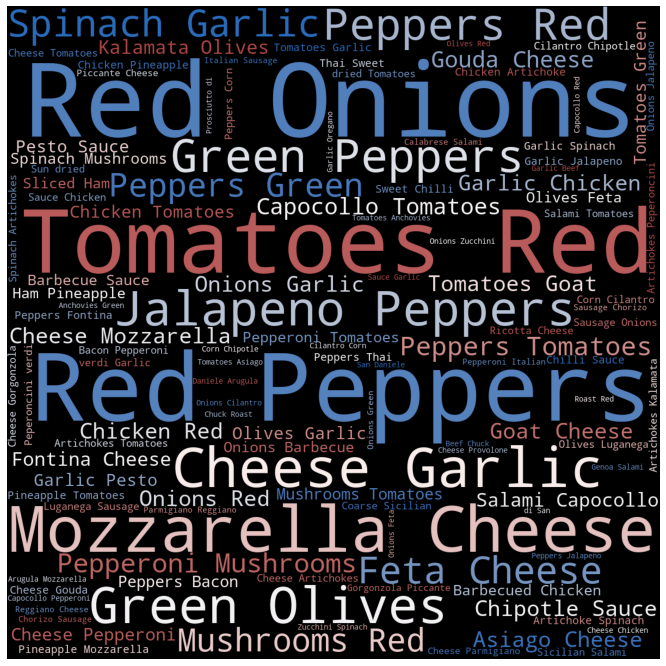

In [38]:

text = ' '.join(df['pizza_ingredients'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
plt.show()

In [39]:
fig = px.scatter(df, x = "pizza_size", y = "total_price", color = "pizza_size")
fig.show()

<a id="5"></a>
# <p style="padding:10px;background-color:black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">🍕Result🍕</p>

    
    
* 📌It is usually busy during lunch and dinner hours.
    
* 📌Order years are 2015.
  
* 📌The number of orders is high on Fridays.

* 📌"Big meat s" is the most ordered code.

* 📌Generally, when ordering 1 piece, at least 4 people are ordered.

* 📌The order is given as L size pizza at most.

* 📌Classic pizza is generally preferred.

* 📌Orders increase on Friday and Saturday.

* 📌Tomatoes, red peppers and red onions are usually found in all pizzas.

* 📌Although this pizza shop opens at 9, the number of orders at 9 is almost non-existent.


<a id="6"></a>
# <p style="padding:10px;background-color:black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">🍕Author Message🍕</p>


<p style="background-color:black;font-family:newtimeroman;color:white;font-size:130%;text-align:center;border-radius:20px 20px;"> If you liked this Notebook, please do upvote.<br> If you have any questions, feel free to comment!<br> 🍕 Best Wishes 🍕</p>